In [22]:
import pandas as pd
import numpy as np
from scipy import stats
import scipy
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic
from sklearn.preprocessing import StandardScaler
%pylab inline
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('credit_card_default_analysis.csv')
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [5]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [9]:
return_credit = df[df.default == 0].LIMIT_BAL.values
not_return_credit = df[df.default == 1].LIMIT_BAL.values

In [24]:
np.random.seed(0)

return_credit_median_scores = np.array(list(map(np.median, get_bootstrap_samples(return_credit, 1000))))
not_return_credit_median_scores = np.array(list(map(np.median, get_bootstrap_samples(not_return_credit, 1000))))

print("95% confidence interval for the return_credit median repair time:",  stat_intervals(return_credit_median_scores, 0.05))
print("95% confidence interval for the not_return_credit median repair time:",  stat_intervals(not_return_credit_median_scores, 0.05))

95% confidence interval for the return_credit median repair time: [150000. 150000.]
95% confidence interval for the not_return_credit median repair time: [80000. 90000.]


In [25]:
stats. mannwhitneyu (return_credit, not_return_credit, alternative='two-sided')

MannwhitneyuResult(statistic=95786286.5, pvalue=1.2255485818223303e-189)

In [31]:
def plot_hists(column):
    pylab.figure(figsize(12, 5))
    pylab.subplot(1,2,1)
    pylab.hist(df_return[column], label = 'return')
    pylab.legend()

    pylab.subplot(1,2,2)
    pylab.hist(df_not_return[column], label = 'not_return')
    pylab.legend()

    pylab.show()
df_return = df[df.default == 0]
df_not_return = df[df.default == 1]

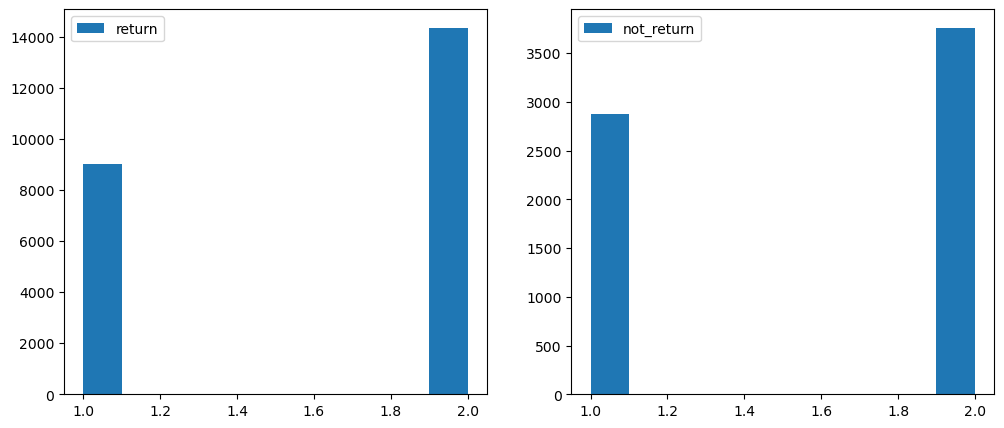

In [32]:

plot_hists('SEX')

In [34]:
stats.mannwhitneyu(df_return.SEX, df_not_return.SEX)

MannwhitneyuResult(statistic=81172368.0, pvalue=4.476478692126115e-12)

In [35]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = sample1.value_counts()[1]/ float(sample1.shape[0])
    p2 = sample2.value_counts()[1]/ float(sample2.shape[0])
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ float(sample1.shape[0]) + p2 * (1 - p2)/ float(sample2.shape[0]))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ float(sample1.shape[0]) + p2 * (1 - p2)/ float(sample2.shape[0]))
    
    return (left_boundary, right_boundary)

In [36]:
sex_not_return_interval = proportions_diff_confint_ind(df_return.SEX, df_not_return.SEX)
print("sex dif mean 95% confidence interval", sex_not_return_interval)

sex dif mean 95% confidence interval (-0.060548077974896725, -0.03363493274962867)


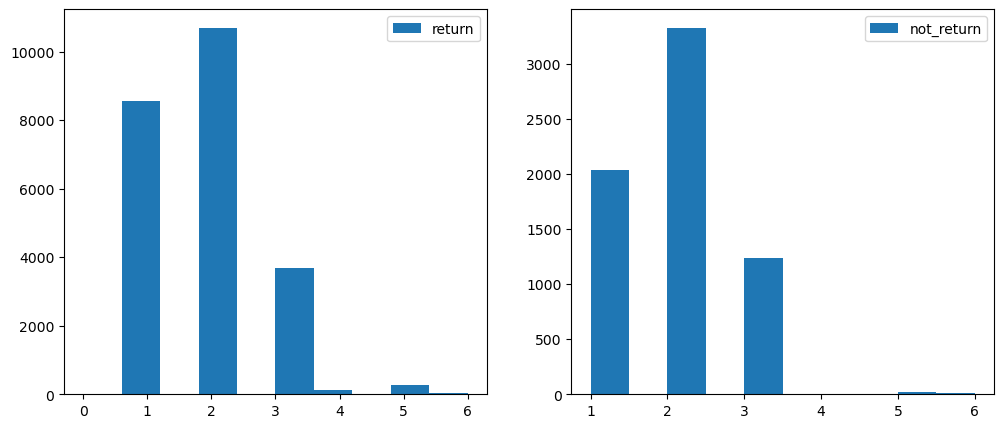

In [37]:
plot_hists('EDUCATION')

In [38]:
ct_educ_def = pd.crosstab(df.EDUCATION, df.default)  
ct_educ_def.head()

default,0,1
EDUCATION,,
0,14,0
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7


In [51]:
ct_educ_def

default,0,1
EDUCATION,,
0,14,0
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7
5,262,18
6,43,8


In [47]:
ct_educ_def.values

array([[   14,     0],
       [ 8549,  2036],
       [10700,  3330],
       [ 3680,  1237],
       [  116,     7],
       [  262,    18],
       [   43,     8]], dtype=int64)

In [50]:
stats.chi2_contingency(ct_educ_def.values)

Chi2ContingencyResult(statistic=163.21655786997073, pvalue=1.2332626245415605e-32, dof=6, expected_freq=array([[1.0903200e+01, 3.0968000e+00],
       [8.2435980e+03, 2.3414020e+03],
       [1.0926564e+04, 3.1034360e+03],
       [3.8293596e+03, 1.0876404e+03],
       [9.5792400e+01, 2.7207600e+01],
       [2.1806400e+02, 6.1936000e+01],
       [3.9718800e+01, 1.1281200e+01]]))

In [66]:
ct_educ_def/ct_educ_def.sum(axis=1).values.reshape(-1,1)

default,0,1
EDUCATION,,
0,1.000000,0.000000
1,0.807652,0.192348
2,0.762651,0.237349
3,0.748424,0.251576
4,0.943089,0.056911
5,0.935714,0.064286
6,0.843137,0.156863


In [63]:
ct_educ_def.sum(axis=1).values.reshape(-1,1)

array([[   14],
       [10585],
       [14030],
       [ 4917],
       [  123],
       [  280],
       [   51]], dtype=int64)

In [65]:
ct_educ_def.sum(axis=1).values

array([   14, 10585, 14030,  4917,   123,   280,    51], dtype=int64)

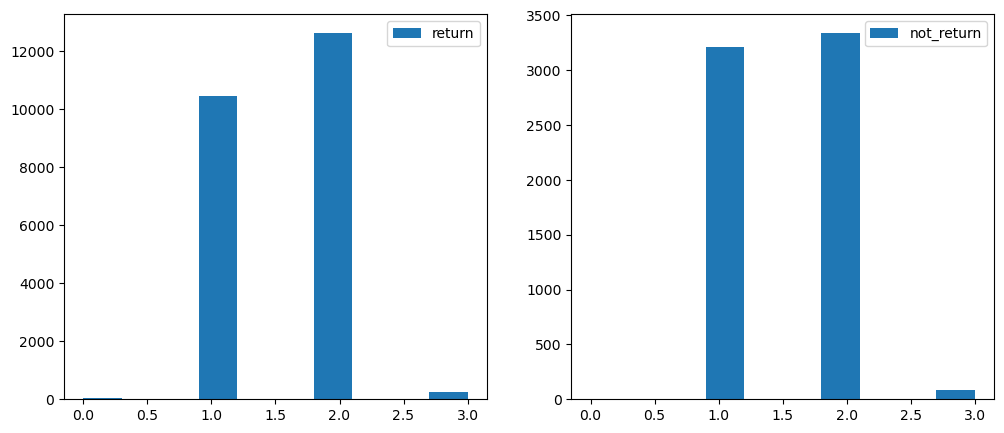

In [67]:
plot_hists('MARRIAGE')

In [68]:
ct_mar_def = pd.crosstab(df.MARRIAGE, df.default)  
ct_mar_def.head()

default,0,1
MARRIAGE,,
0,49,5
1,10453,3206
2,12623,3341
3,239,84


In [69]:
print('p-value о важности семейного положения в невозрате кредита ',stats.chi2_contingency(ct_mar_def)[1])

p-value о важности семейного положения в невозрате кредита  8.825862457577375e-08


In [70]:
ct_mar_def/ct_mar_def.sum(axis=1).values.reshape(-1,1)

default,0,1
MARRIAGE,,
0,0.907407,0.092593
1,0.765283,0.234717
2,0.790717,0.209283
3,0.739938,0.260062


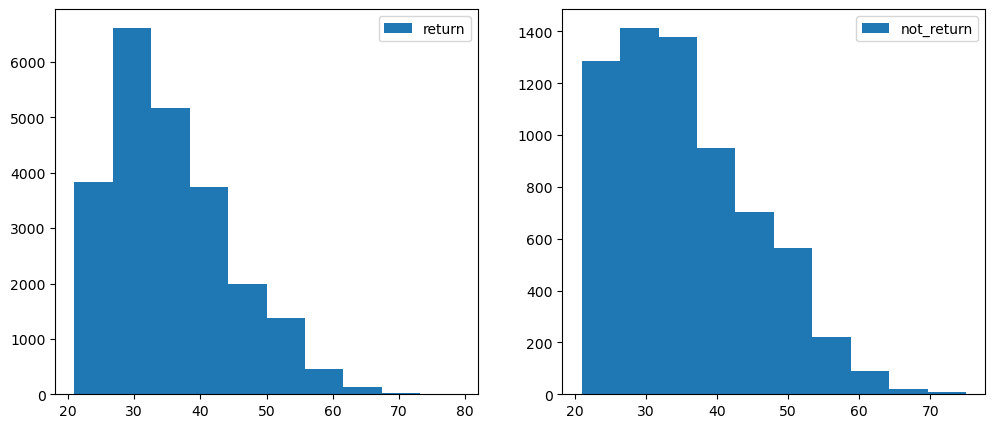

In [71]:
plot_hists('AGE')

In [75]:
np.random.seed(0)

return_credit = df[df.default == 0].AGE.values
not_return_credit = df[df.default == 1].AGE.values

return_credit_median_scores = np.array(list(map(np.median, get_bootstrap_samples(return_credit, 1000))))
not_return_credit_median_scores = np.array(list(map(np.median, get_bootstrap_samples(not_return_credit, 1000))))

print("95% confidence interval for the return_credit median repair time:",  stat_intervals(return_credit_median_scores, 0.05))
print("95% confidence interval for the not_return_credit median repair time:",  stat_intervals(not_return_credit_median_scores, 0.05))

95% confidence interval for the return_credit median repair time: [34. 34.]
95% confidence interval for the not_return_credit median repair time: [34. 35.]


In [73]:
return_credit

array([34, 37, 57, ..., 38, 39, 43], dtype=int64)

In [77]:
stats.mannwhitneyu(return_credit,not_return_credit)

MannwhitneyuResult(statistic=76966879.5, pvalue=0.3725035434898616)